# Suport Vector Machines 

Los SVC tienen como objetivo encontrar el mejor vector que define el hiperplano de separación óptimo entre las clases. Además, tiene la opción de penalizar los errores de clasificación en la clase minoritaria mediante regularización l1 o l2, por lo que es adecuado para problemas de clases desequilibradas. Además, si los datos no son separables linealmente en el espacio de características original, se puede establecer un kernel no lineal. Los diferentes kernels utilizan diferentes cálculos de distancias para la clasificación.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
from mls import *
from prepro import pprint,prepro

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [20]:
from imblearn.pipeline import Pipeline as pipeline_sampler
from imblearn.over_sampling import ADASYN

In [21]:
df=(prepro(path='data.xlsx',n=10,info=False).pipe(seleccion))

El dataset contiene 514 filas y 21 columnas


In [22]:
pprint(df.head(3),'',2)

,SEXO,PSNR,SUBTIPO,MRSS,RAYNAUD,ULCERAS,DISCROMIAS,ROCES_TENDINOSOS,CONTRACTURAS_FLEX,ARTRITIS,EPID,HAP,CRISIS_RENAL,AESOFAGICA,AGASTRICA,AINTESTINAL,PERDIDA_PESO,ANEMIA,EDAD_DEBUT,EXITUS5,CFC
0,0,Endurecimiento piel,0,6,0,0,0,0,1,0,0,0,0,1,0,0,1,1,66,1,CF2
1,0,Endurecimiento piel,0,24,1,1,0,1,0,0,0,0,0,0,0,0,0,1,66,1,CF2
2,0,Puffy hand,1,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,74,1,CF2


In [23]:
y=df.exitus5
x=df.drop(columns='exitus5')
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,stratify=y)

## SVM con regularización

In [24]:
prepro = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), x._get_numeric_data().columns),
        ("encoder", OneHotEncoder(handle_unknown="ignore"), ['CFc','PSNR'])],
    remainder='passthrough',verbose_feature_names_out=False)

svmod = Pipeline(steps=[("prepro", prepro), 
           ("svm",SVC(kernel='linear'))])

In [25]:
svmod[1].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Los kernels no lineales no producen coeficientes directamente interpretables como en el caso del kernel lineal. Por ejemplo, el kernel sigmoide es una función de similitud no lineal que mapea los datos a un espacio de características de mayor dimensión utilizando una función sigmoide. D
Debido a la naturaleza no lineal del kernel sigmoide, el hiperplano de separación en el espacio de características de mayor dimensión no se puede describir simplemente mediante coeficientes como en el caso del kernel lineal.

Sin embarse puede obtenerener información sobre el modelo SVC con kes no linealesoide a través de los atributos del modelo entrenado, como los vectores de soporte, los multiplicadores de Lagrange y los sesgos. Estos atributos pueden proporcionar información sobre cómo se construyó el modelo y cómo se realiza la clasificación.

In [26]:
params = {'svm__C': [.005,.01,.05]}

grid = GridSearchCV(estimator = svmod, 
                   param_grid = params, 
                   scoring = 'recall',
                   verbose = 0)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('prepro',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['mRSS', 'edad_debut'], dtype='object')),
                                                                        ('encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['CFc',
                                                                          'PSNR'])],
                                                          verbose_feature_names_out=False)),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': [0.005, 0.01, 0.05]}, scoring='recall')

In [27]:
mejor=best_grid(grid,xtrain,ytrain)

Mejor score: 0.43809523809523815
Mejores parametros: {'svm__C': 0.05}
Ajustando el mejor modelo...


In [28]:
coefi(mejor,'svm').pipe(pprint,'SVM',2)

,COEFICIENTES
Variable,
mRSS,"0,55"
edad_debut,"0,42"
PSNR_Endurecimiento piel,"0,25"
PSNR_Puffy hand,"-0,21"
Aesofagica,"0,20"
contracturas_flex,"-0,19"
sexo,"0,19"
perdida_peso,"-0,19"
discromias,"0,18"


============= Report classification ==============

Sensibilidad del train: 0.48
Sensibilidad del test: 0.44

              precision    recall  f1-score   support

          No       0.89      0.95      0.92        85
          Si       0.67      0.44      0.53        18

    accuracy                           0.86       103
   macro avg       0.78      0.70      0.73       103
weighted avg       0.85      0.86      0.85       103


========= Confusion matrix train vs test =========



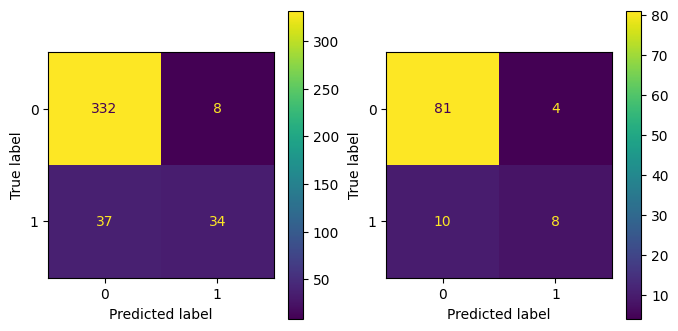

In [29]:
metricas(mejor,xtrain,ytrain,xtest,ytest)

## SVM con regularización + pesos ponderados

In [30]:
svmod = Pipeline(steps=[("prepro", prepro), 
           ("svm",SVC(class_weight='balanced',kernel='linear'))])

params = {'svm__C': [.005,.01,.05]}

grid = GridSearchCV(estimator = svmod, 
                   param_grid = params, 
                   scoring = 'recall',
                   verbose = 0)

grid.fit(xtrain,ytrain)
mejor=best_grid(grid,xtrain,ytrain)
coefi(mejor,'svm').pipe(pprint,'SVM + pesos ponderados',2)

Mejor score: 0.6914285714285715
Mejores parametros: {'svm__C': 0.05}
Ajustando el mejor modelo...


,COEFICIENTES
Variable,
discromias,"0,66"
edad_debut,"0,53"
mRSS,"0,50"
subtipo,"0,42"
sexo,"0,40"
CFc_CF1,"-0,32"
PSNR_Puffy hand,"-0,32"
PSNR_Endurecimiento piel,"0,28"
Aesofagica,"0,26"


============= Report classification ==============

Sensibilidad del train: 0.82
Sensibilidad del test: 0.83

              precision    recall  f1-score   support

          No       0.96      0.76      0.85        85
          Si       0.43      0.83      0.57        18

    accuracy                           0.78       103
   macro avg       0.69      0.80      0.71       103
weighted avg       0.86      0.78      0.80       103


========= Confusion matrix train vs test =========



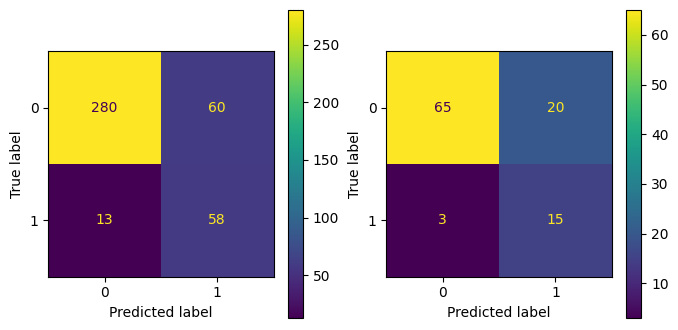

In [31]:
metricas(mejor,xtrain,ytrain,xtest,ytest)

## SVM con oversampling

In [38]:
svmod = pipeline_sampler(steps=[("prepro", prepro),
                        ('sampler',ADASYN()),
           ("svm",SVC(kernel='linear'))])

params={'sampler__sampling_strategy':[.5,.7,.9],
        'sampler__n_neighbors':[3,5,7,10],
       'svm__C': [.005,.01,.05]}

grid = GridSearchCV(estimator = svmod, 
                   param_grid = params, 
                   scoring = 'recall',
                   verbose = 0)
grid.fit(xtrain,ytrain)
mejor=best_grid(grid,xtrain,ytrain)
mejor.fit(xtrain,ytrain)

Mejor score: 0.7485714285714286
Mejores parametros: {'sampler__n_neighbors': 5, 'sampler__sampling_strategy': 0.9, 'svm__C': 0.01}
Ajustando el mejor modelo...


Pipeline(steps=[('prepro',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  Index(['mRSS', 'edad_debut'], dtype='object')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CFc', 'PSNR'])],
                                   verbose_feature_names_out=False)),
                ('sampler', ADASYN(sampling_strategy=0.9)),
                ('svm', SVC(C=0.01, kernel='linear'))])

In [36]:
coefi(mejor,'svm').pipe(pprint,'SVM + oversampling',2)

,COEFICIENTES
Variable,
discromias,"0,50"
edad_debut,"0,44"
mRSS,"0,42"
CFc_CF1,"-0,32"
sexo,"0,27"
PSNR_Endurecimiento piel,"0,26"
Aesofagica,"0,25"
CFc_CF2,"0,20"
subtipo,"0,19"


============= Report classification ==============

Sensibilidad del train: 0.83
Sensibilidad del test: 0.83

              precision    recall  f1-score   support

          No       0.96      0.76      0.85        85
          Si       0.43      0.83      0.57        18

    accuracy                           0.78       103
   macro avg       0.69      0.80      0.71       103
weighted avg       0.86      0.78      0.80       103


========= Confusion matrix train vs test =========



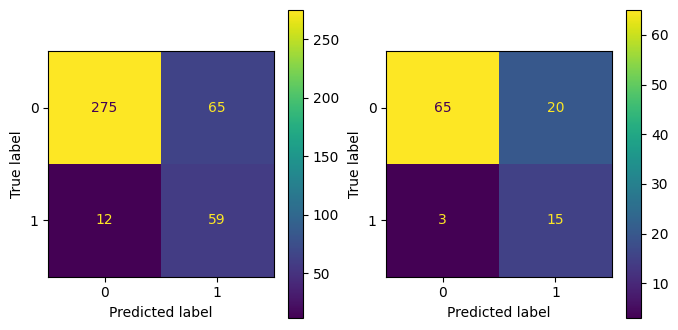

In [39]:
metricas(mejor,xtrain,ytrain,xtest,ytest)